# Data

## Temporal

* **14 trạm đo water level**
* **16 trạm đo mưa**
* Từ 01/04/2020 -> 30/08/2022

## Spatial

* Dữ liệu các **sự kiện lụt** lịch sử theo từng **đặc điểm không gian**
* **DEM**: mô hình độ cao (USGS)
* **Slope**: độ dốc (USGS)
* **Khoảng cách** từ sông tới **đường gần nhất**
* **Khoảng cách** từ **đường**: địa điểm gần sông nhất
* **Độ thoát nước** theo từng khu vực
* **Land use**

# Approach

*Include 3 giai đoạn chính:*
* **Temporal prediction**
* **Spatial interpolation**
* **Map generation**

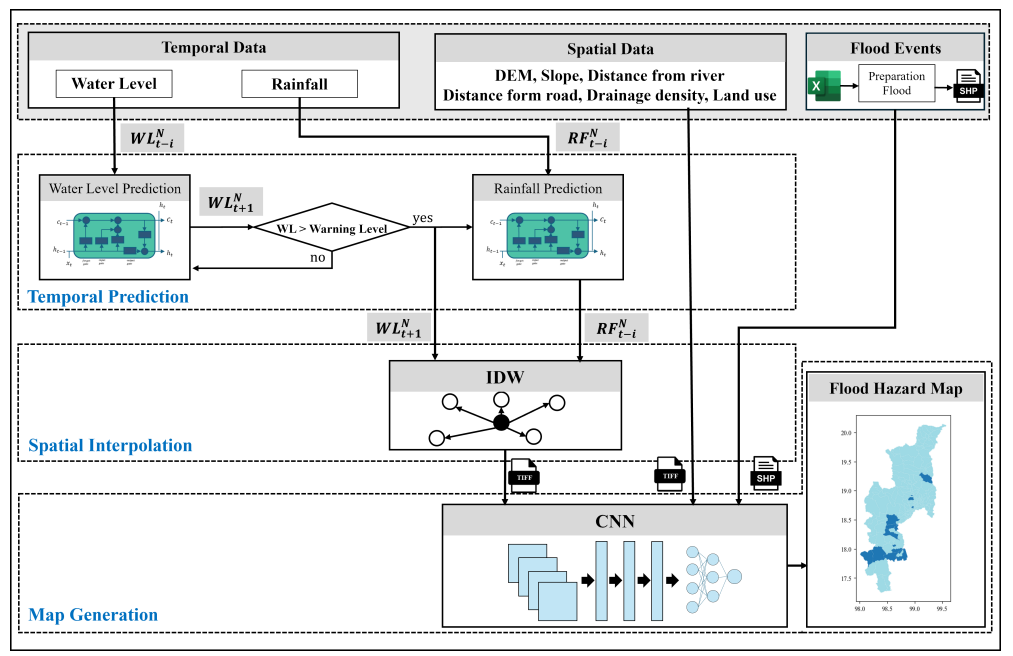

## Temporal prediction

**LSTM**

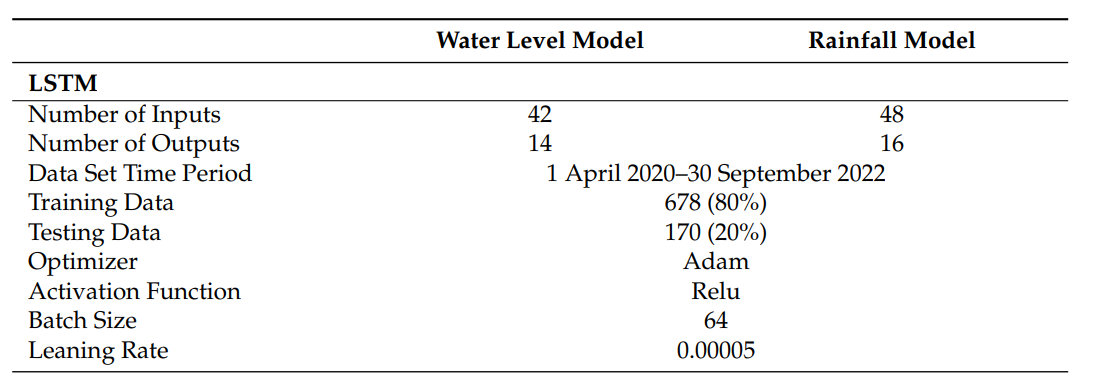

* lấy **3 điểm thời gian quá khứ** để dự đoán **output**

## Spatial Interpolation

* Deterministic:
    * Linear interpolation
    * **IDW**
    * Spline
* Non-deterministic:
    * Kriging and Gaussian Processes

<font size=5> **IDW**:

<font size=5>$$ \hat{x_p} = \sum_{n=1}^N w_ix_i $$

trong đó:
* $x_p$: giá trị chưa biết
* $N$: tổng số giá trị đã biết
* $x_i$: giá trị đã biết thứ $i$
* $w_i$: trọng số của giá trị đã biết thứ $i$ (Tính dựa trên khoảng cách giữa điểm $i$ và $p$):

<font size=5> $$ w_i = \frac{ \frac{1}{d_i} }{ \sum_{i=1}^N \frac{1}{d(x_i,x_p)} } $$

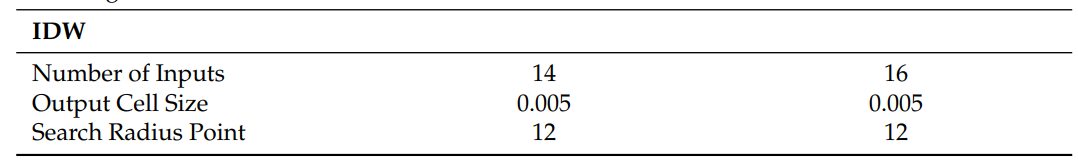

**Input**:
* Các điểm đã biết: 14 trạm đo **WL** và 16 **Rainfall**
* Vị trí các điểm cần ước tính (Không có trạm đo)
* **Số điểm lân cận** dùng để ước tính: 12


**OUTPUT**:
* Các giá trị ước tính của các điểm chưa biết trong không gian
* Xây dựng được **bản đồ không gian** thể hiện sự phân bố của các giá trị ước tính

## Map Generation

### Deterministic

use **mathematical equations** based on fundamental principles **to simulate and predict disaster behaviors**:
* **SWAT**: Soil and Water Assessment Tool
* **TOPMODEL**: TOPography-based hydrological MODEL
* **NAQPMS**: Nested Air Quality Prediction Modeling System

> Đòi hỏi dữ liệu chi tiết, khó thu thập cho khu vực rộng lớn

### Non-determinisetic

* **Statistic methods**:
    * **AHP**: analytical hierachy process
    * **LR**: Logistic regression
    * **FR**: frequency ratio
* **Machine learning methods**:
    * **SVMs**
    * **RFs**
    * **CNNs**

> Sử dụng `CNNs`

**Architecture**:
* sâu 5 layers
* 2 **pooling** size 120
* **dense layers** size 86
* **activation function**: ReLU

**Input**:  **4080** ảnh cỡ: **33 x 33 x 8**(được chia thành các vùng không gian)  
**8 features:**
* Mô hình độ cao (DEM)
* Độ dốc (Slope)
* Khoảng cách đến sống (Distance from the river)
* Khoảng cách đến đường (Distance from road)
* Mật độ thoát nước (Drainage density)
* Sử dụng đất (Land use)
* Mực nước dự đoán (Từ IDW)
* Lượng mưa dự đoán (Từ IDW)

* Dữ liệu về sự kiện lũ lụt lịch sử (Nhãn)

* **Train**: 10 ngày
* **Validation**: 6 ngày
* **Test**: 4 ngày

> Mỗi ngày 204 ảnh

# Hardware

* CPU: 3.1 GHz
* GPU: Tesla V100 8Gb
* Ram: 64gb

# Result

## Evaluate

**WL and Rainfall**

* RMSE
* MAE
* R2

**Map**: 2 classes: flood, no flood

* Accuracy
* Precision
* Recall
* F1-Score

## Results

**WL and Rainfall**

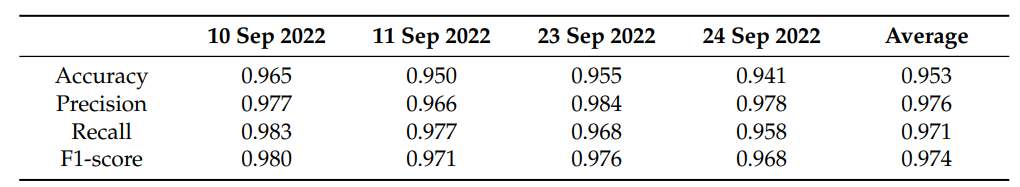

**MAP**

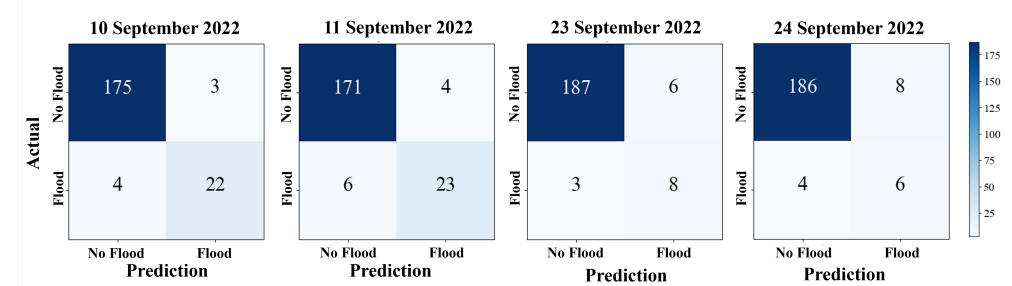